# Python yordamida ko'p chiziqli regressiya

In [2]:
import pandas as pd
import numpy as np
import string
import csv
import random
import warnings


In [3]:
## Modelni qurish 
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Ma'lumotlarni vizualazizatsiyalash
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Ta’lim texnikasi, o‘quvchilarning faolligi va ta’lim natijalari to‘g‘risidagi ma’lumotlardan foydalangan holda o‘quvchilar faoliyatini yaxshilashda turli o‘qitish usullarining samaradorligi ma’lumotlari mavjud. Mavjud ma’lumotlar asosida quyidagilarni aniqlang:


## 1. Ma’lumotlar bazasidagi har bir atribut orasidagi tarqalish grafigini hosil qiling.

In [9]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df_pie = pd.read_csv('task_7.csv', sep=',')

print(df_pie.shape)
df_pie


(30, 3)


,Ta’lim texnikasi,o‘quvchilarning faolligi,natijasi
0,Analogiya metodi,98,5
1,klaster metodi,60,3
2,Fikriy hujum metodi,58,2
3,Induksiya metodi,58,2
4,klaster metodi,57,2
5,Deduksiya metodi,90,5
6,Taqqoslash usuli,84,4
7,Induksiya metodi,86,5
8,Taqqoslash usuli,88,5
9,6x6x6 metodi,86,5


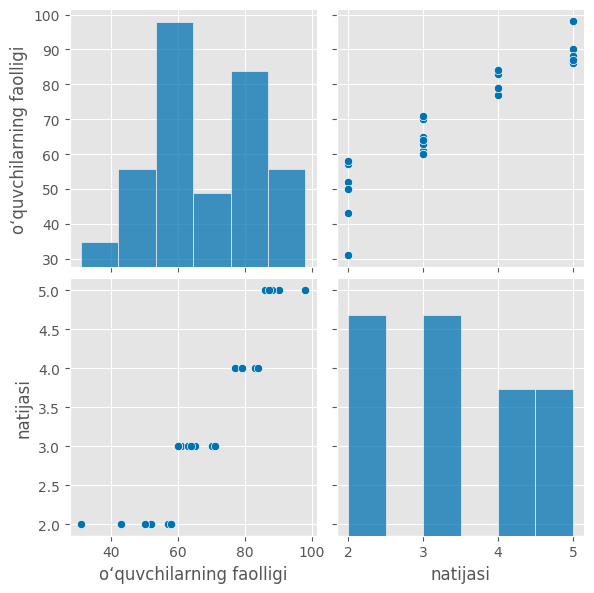

In [10]:
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

## 2. Hosil bo’lgan grafikka ko’ra, atributlarning bir-biriga bog’liqligini o’rganing. Hisobot shaklida mustaqil va bog’liq o’zgaruvchilarni aniqlang

Birinchi tartiblangan ustun, Ijtimoiy holati, Fannlardan o'zlashtrgan o'rtacha baxosi, davomati bog'liq o'zgaruvchi. Kursdan kursga o'tish mustaqil o'zgaruvchi. Har bir talabaning o'zlashtrish baxosi 2.6 dan yuqori va darslarda qatnashganlik %i yuqori bo'lganda kursdan kursga o'tishi 1 aks holda 0 etib belgilandi.

## 3. Regressiya modelini quring. Qurilgan modelni hisobot shaklida yozing.

In [17]:
df_data = pd.read_csv('task_7.csv', sep=',')
texnikalar = ["Induksiya metodi", "Deduksiya metodi", "Analogiya metodi", "Taqqoslash usuli", "Fikriy hujum metodi", "6x6x6 metodi", "klaster metodi", "zakovatli zukko metodi"]
# Mustaqil va bog'liq o'zgaruvchilarni o'rnatish
z = []
for i in df_data["Ta’lim texnikasi"]:
    ptiny(texnikalar[i])
X = df_data[["Ta’lim texnikasi","o‘quvchilarning faolligi"]]

y = df_data["natijasi"]
z
# Sklearn kutubxonasidan modelni ishga tushirish va uni  ma'lumotlarimizga moslash
# regr = linear_model.LinearRegression()
# model = regr.fit(X, y)

# print('Intercept:', model.intercept_)
# print('Koeffisiyentlar:', model.coef_)

0           Analogiya metodi
1             klaster metodi
2        Fikriy hujum metodi
3           Induksiya metodi
4             klaster metodi
5           Deduksiya metodi
6           Taqqoslash usuli
7           Induksiya metodi
8           Taqqoslash usuli
9               6x6x6 metodi
10          Deduksiya metodi
11          Deduksiya metodi
12          Induksiya metodi
13          Deduksiya metodi
14       Fikriy hujum metodi
15          Deduksiya metodi
16          Taqqoslash usuli
17          Taqqoslash usuli
18            klaster metodi
19          Taqqoslash usuli
20            klaster metodi
21          Taqqoslash usuli
22       Fikriy hujum metodi
23    zakovatli zukko metodi
24            klaster metodi
25          Analogiya metodi
26              6x6x6 metodi
27          Induksiya metodi
28          Taqqoslash usuli
29          Deduksiya metodi
Name: Ta’lim texnikasi, dtype: object

1. Kesish qiymati bizning barcha mustaqil o'zgaruvchilarimizning qiymatlari 0 bo'lsa, bog'liq o'zgaruvchining taxminiy o'rtacha qiymatidir. Bizning holatda bu shuni anglatadiki, agar ijtimoiy holati-yaxshi, o'zlashtrish baxosi 2.6 dan yuqori va davomati 25% danyuqori ko'rsatkichni qaytarsa biz taxminan 0 ta o'quvchi kursdan kursga qoladi.2.  Koeffitsiyentlar uchun biz mos ravishda "Ijtimoiy holat" , "o'rtacha baxo" va davomat o'zgaruvchilari uchun 3 ta qiymatga egamiz. Bu qiymat bizning mustaqil o'zgaruvchimizning bog'liq o'zgaruvchiga munosabatini ifodalaydi, bunda mustaqil o'zgaruvchida aynan 1 ga o'zgarishi bizning bog'liq o'zgaruvchimizning qiymatini koeffitsiyent bilan bir xil miqdorda o'zgartiradi. Misol uchun, agar o'quvchilar o'rtacha baxosi 2.6 dan kamaysa unda taxminan har bir 2.6 dan kamaygan talaba kursdan kursga qolish soni ortib boradi, davomat  36% dan oshgan talabalar ham kursdan kursgaqolish holati ko'payadi

## 4. Regressiya modeliga ko’ra, bog’liq o’zgaruvchilarning qiymati aniq bo’lsa, talabaning kursdan kursga qolishini bashorat qiling.

In [43]:
ijtimoiy = ["temir daftar", "boquvchisini yo'qotgan", "chin yetim", "yoshlar daftari", "ijtimoiy ximoyaga muhtoj oila reestr", "oilali", "yolg'iz"]
for i in ijtimoiy:
    print(i, end=", ")

temir daftar, boquvchisini yo'qotgan, chin yetim, yoshlar daftari, ijtimoiy ximoyaga muhtoj oila reestr, oilali, yolg'iz, 

In [69]:
# Bashorat qilinadigan qiymatlar
print("Talaba ma'lumotlarini kiriting")
social = input('Ijtimoiy xolatini kiriting (0 dan 7 gacha)? \n')
grade = input("o'rtacha bahosini kiriting  (butun son) ? \n")
attendance = input("Darslarga qatlashganlik (davomati) % (0 dan 100&) ? \n")

#social_d = ijtimoiy[social]

try:
    print('Talaba kursdan kursga "{}", Agar ijtimoiy holati "{}" bo\'lsa , o\'rtacha bahosi "{}" bo\'lsa va davomati "{}%" bo\'lsa.'.format(
        ("o'tmaydi", "o'tadi")[model.predict([[float(social), float(grade), float(attendance)]])[0]>0.25],
        social, 
        grade, 
        attendance))
except Exception as e: print(e)
# except ValueError:
    # print('Faqat butun son kiriting:\n- masalan, 1, 4, 7\n- haqiqiy son kiriting e.g. 3.8')


Talaba ma'lumotlarini kiriting


Ijtimoiy xolatini kiriting (0 dan 7 gacha)? 
 5
o'rtacha bahosini kiriting  (butun son) ? 
 4.5
Darslarga qatlashganlik (davomati) % (0 dan 100&) ? 
 80


Talaba kursdan kursga "o'tadi", Agar ijtimoiy holati "5" bo'lsa , o'rtacha bahosi "4.5" bo'lsa va davomati "80%" bo'lsa.
